<a href="https://colab.research.google.com/github/nicolas-jb/IA_DATASET/blob/main/tp_grupo3_IA_2022_escenario2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Configuración, dependencias y variables

In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/My Drive/

#Clonar solo la primera vez
#! git clone https://github.com/nicolas-jb/IA_DATASET.git

#%cd IA_DATASET

#! git pull


%pip install tensorflow

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds

import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import cv2                                 
from tqdm import tqdm

from skimage.io import imread
from keras.layers import Input, Dense

from tensorflow import keras
from keras import layers
from keras.datasets import mnist
from keras.models import Sequential
from skimage import transform
from skimage.color import rgb2gray
from collections import Counter
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

from PIL import Image

import pandas as pd

tipos_aves = ['Bailarin Azul', 'Cardenal', 'Hornero']

tam_img = (32, 32)

capa_salida = f'{len(tipos_aves)}'
capa_oculta = [512, 256, 128]
epoca = 200
tasa_aprendizaje = 0.0001














Mounted at /content/drive
/content/drive/My Drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Cargar información y procesar


In [ ]:
ROOT_PATH = "/content/drive/My Drive/IA_DATASET/dataset"
dir_entrenamiento = os.path.join(ROOT_PATH, "training")
dir_test = os.path.join(ROOT_PATH, "testing")

def cargarDatos(dir):
    directorios = [d for d in os.listdir(dir) 
                   if os.path.isdir(os.path.join(dir, d))]
    labels = []
    images = []
    label_index = 0
    for d in directorios:
        label_directory = os.path.join(dir, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if (f.endswith(".jpg") or f.endswith(".jpeg"))]
        for f in file_names:
            np.array(f)
            images.append(imread(f))
            labels.append(label_index)
        label_index = label_index + 1
    return np.array(images), np.array(labels)


train_images, train_labels = cargarDatos(dir_entrenamiento)
test_images, test_labels = cargarDatos(dir_test)

values, counts = np.unique(train_labels, return_counts = True)
classWithQuantityTrain = list(zip(values, counts))
total = 0


#Ajustar tamaño & conversión ByN 
train_images32 = [transform.resize(image, (32,32)) for image in train_images]
train_images32 = np.array(train_images32)
test_images32 = [transform.resize(image, (32,32)) for image in test_images]
test_images32 = np.array(test_images32)

train_images_gray = rgb2gray(train_images32)
test_images_gray = rgb2gray(test_images32)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Construcción de modelo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entrada (Flatten)           (None, 1024)              0         
                                                                 
 oculta_1 (Dense)            (None, 512)               524800    
                                                                 
 oculta_2 (Dense)            (None, 256)               131328    
                                                                 
 oculta_3 (Dense)            (None, 128)               32896     
                                                                 
 salida (Dense)              (None, 3)                 387       
                                                                 
Total params: 689,411
Trainable params: 689,411
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


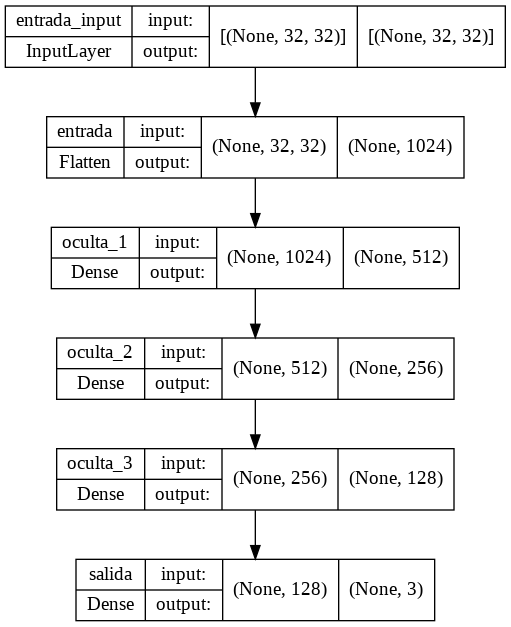

In [ ]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape = tam_img, name = "entrada"),
    keras.layers.Dense(capa_oculta[0], activation='relu', name = "oculta_1"),
    keras.layers.Dense(capa_oculta[1], activation='relu', name = "oculta_2"),
    keras.layers.Dense(capa_oculta[2], activation='relu', name = "oculta_3"),
    keras.layers.Dense(capa_salida, activation='softmax', name="salida")
])

model.compile(keras.optimizers.Adam(lr=tasa_aprendizaje),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.summary()
plot_model(model, show_layer_names=True, show_shapes=True)

Entrenamiento

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 1s 17ms/step - loss: 1.1526 - accuracy: 0.2890
Epoch 2/200
5/5 [==============================] - 0s 16ms/step - loss: 1.0659 - accuracy: 0.4219
Epoch 3/200
5/5 [==============================] - 0s 16ms/step - loss: 1.0206 - accuracy: 0.5282
Epoch 4/200
5/5 [==============================] - 0s 16ms/step - loss: 0.9978 - accuracy: 0.5914
Epoch 5/200
5/5 [==============================] - 0s 16ms/step - loss: 0.9772 - accuracy: 0.4983
Epoch 6/200
5/5 [==============================] - 0s 14ms/step - loss: 0.9532 - accuracy: 0.5714
Epoch 7/200
5/5 [==============================] - 0s 20ms/step - loss: 0.9257 - accuracy: 0.5980
Epoch 8/200
5/5 [==============================] - 0s 18ms/step - loss: 0.9144 - accuracy: 0.6113
Epoch 9/200
5/5 [==============================] - 0s 17ms/step - loss: 0.8981 - accuracy: 0.6213
Epoch 10/200
5/5 [==============================] - 0s 15ms/step - loss: 0.8800 - accuracy: 0.6545
Epoch 11/200
5/5 [=============

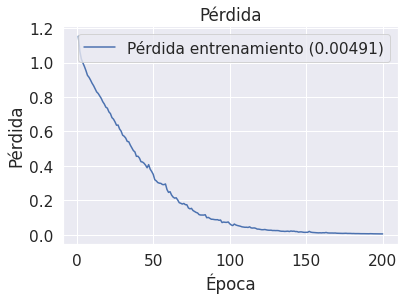

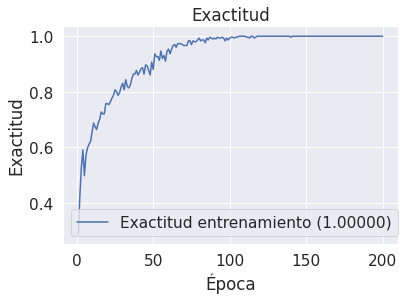

In [ ]:
history = model.fit(np.array(train_images_gray), 
                    train_labels,
                    batch_size = 64,
                    epochs = epoca)


loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]



epoca = range(1,len(history.history[loss_list[0]]) + 1)


plt.figure(1)
for l in loss_list:
    plt.plot(epoca, history.history[l], 'b', label='Pérdida entrenamiento (' + str(str(format(history.history[l][-1],'.5f'))+')'))
for l in val_loss_list:
    plt.plot(epoca, history.history[l], 'g', label='Pérdida validación (' + str(str(format(history.history[l][-1],'.5f'))+')'))

plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()


plt.figure(2)
for l in acc_list:
    plt.plot(epoca, history.history[l], 'b', label='Exactitud entrenamiento (' + str(format(history.history[l][-1],'.5f'))+')')
for l in val_acc_list:    
    plt.plot(epoca, history.history[l], 'g', label='Exactitud validación (' + str(format(history.history[l][-1],'.5f'))+')')

plt.title('Exactitud')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()
plt.show()


Evaluación


In [ ]:
test_loss, test_acc = model.evaluate(test_images_gray,  test_labels, verbose=2)
print("\n-Evaluación de modelo: ")
print('Exactitud de prueba:', test_acc)
print('Pérdida:', test_loss)

predictions = model.predict(test_images_gray)
pred_labels = np.argmax(predictions, axis = 1)



3/3 - 0s - loss: 0.2720 - accuracy: 0.9605 - 174ms/epoch - 58ms/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)



-Evaluación de modelo: 
Exactitud de prueba: 0.9605262875556946
Pérdida: 0.27198609709739685


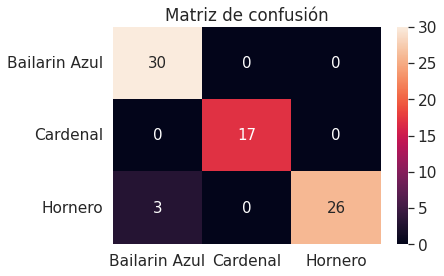

Reporte de clasificación
               precision    recall  f1-score   support

Bailarin Azul       0.91      1.00      0.95        30
     Cardenal       1.00      1.00      1.00        17
      Hornero       1.00      0.90      0.95        29

     accuracy                           0.96        76
    macro avg       0.97      0.97      0.97        76
 weighted avg       0.96      0.96      0.96        76



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
matrix = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(matrix, annot=True, 
          annot_kws={"size": 15}, 
          xticklabels=tipos_aves, 
          yticklabels=tipos_aves, ax = ax)
ax.set_title('Matriz de confusión')
plt.show()



predictions = model.predict(test_images_gray)

Y_pred = model.predict_generator(test_images_gray, len(test_images_gray) // 32 + 1)
y_pred = np.argmax(Y_pred, axis=1)

print('Reporte de clasificación')
print(classification_report(test_labels, y_pred, target_names=tipos_aves, zero_division=0))

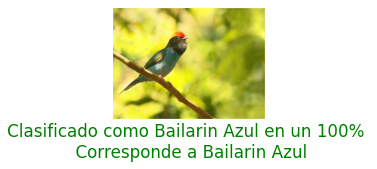

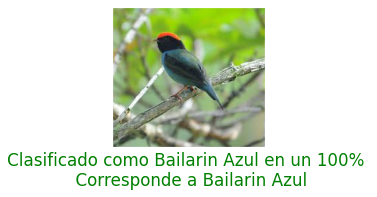

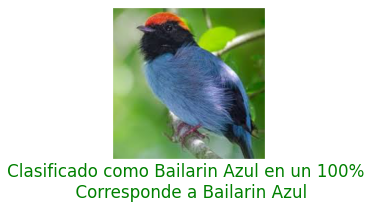

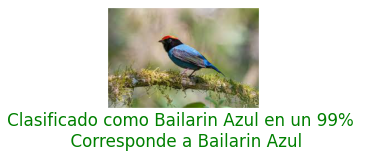

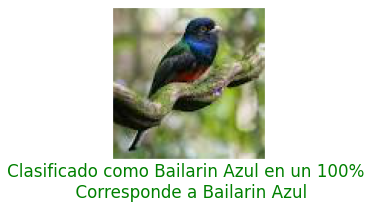

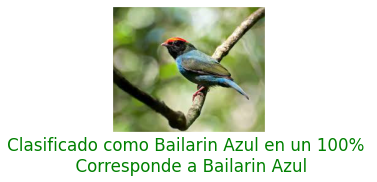

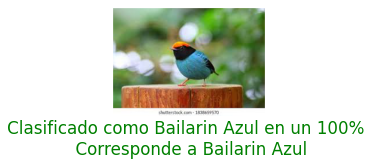

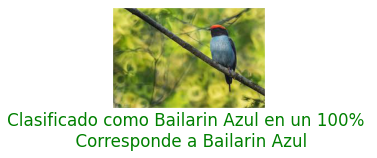

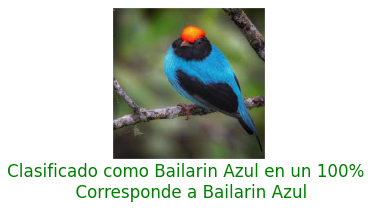

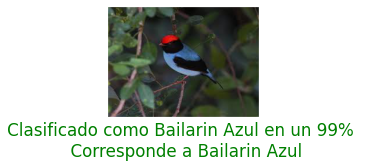

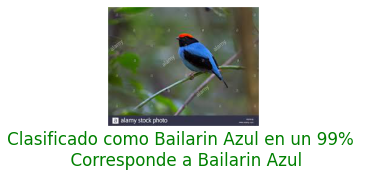

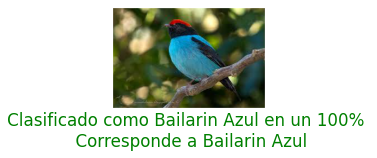

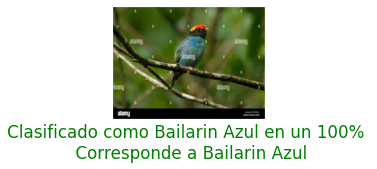

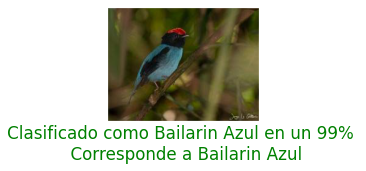

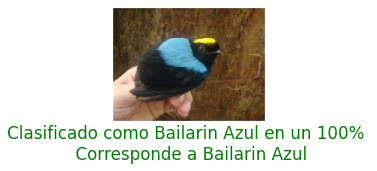

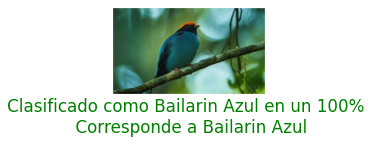

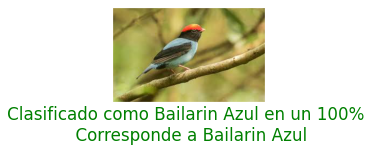

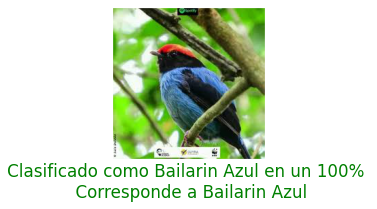

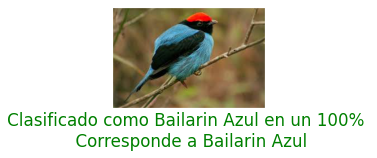

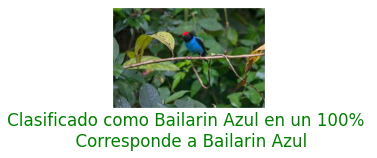

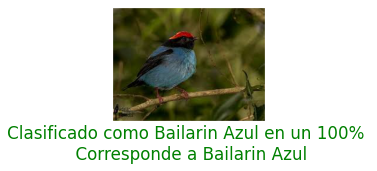

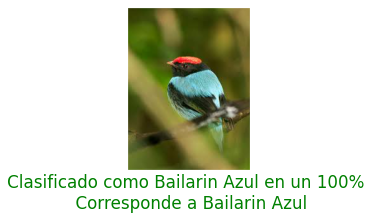

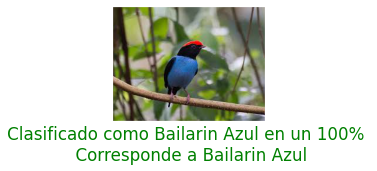

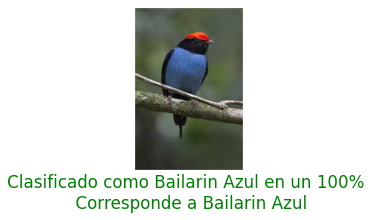

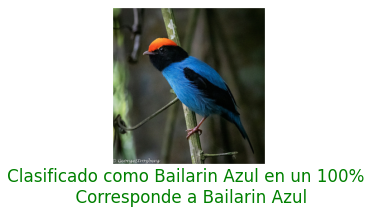

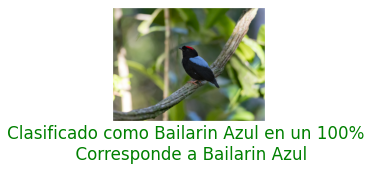

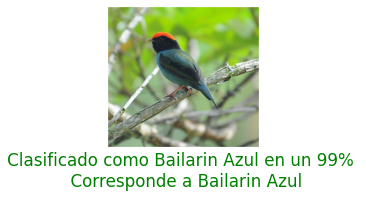

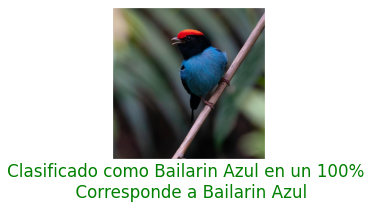

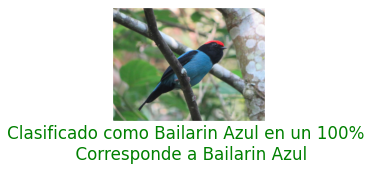

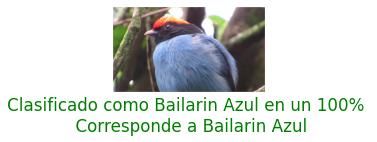

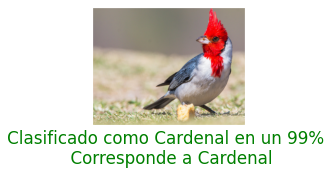

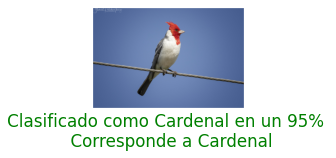

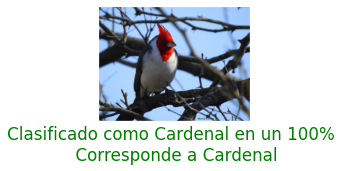

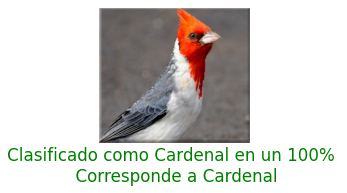

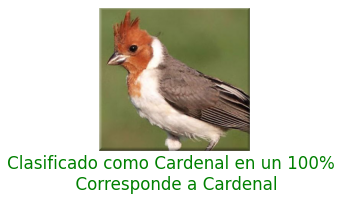

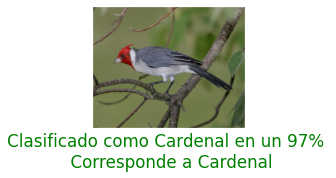

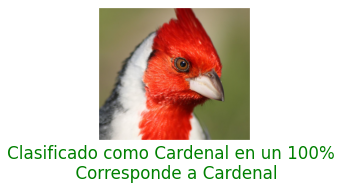

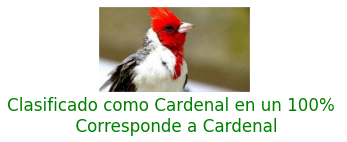

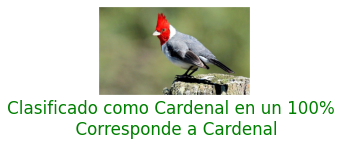

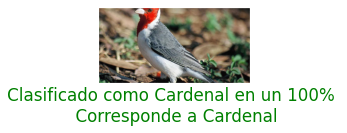

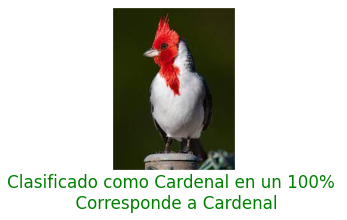

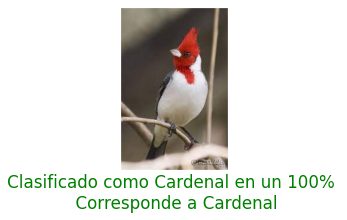

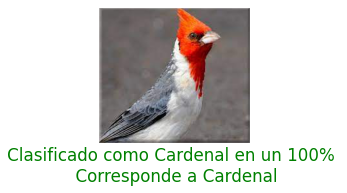

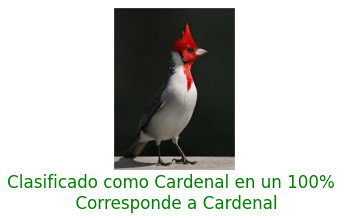

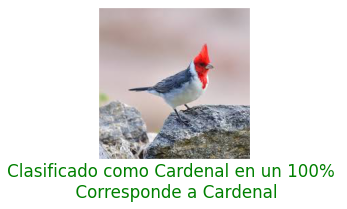

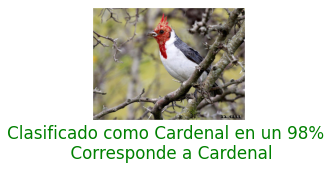

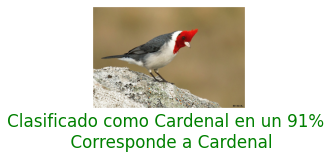

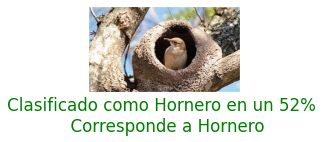

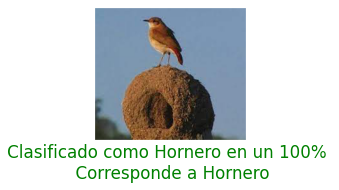

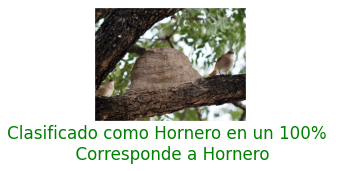

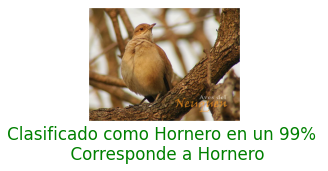

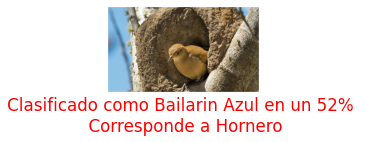

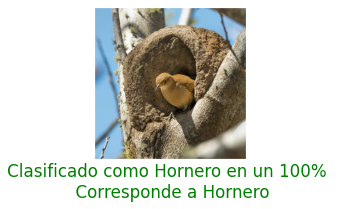

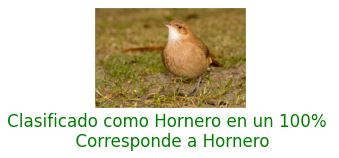

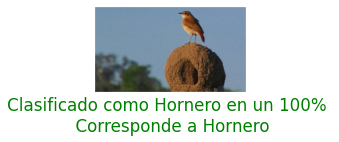

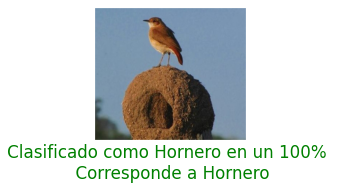

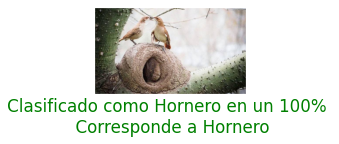

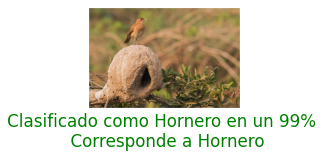

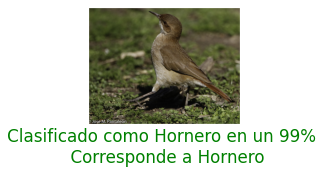

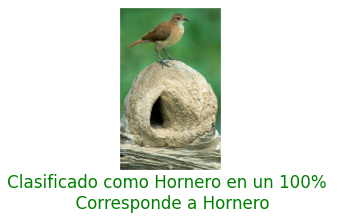

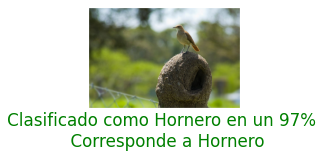

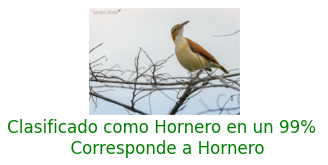

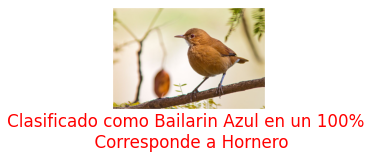

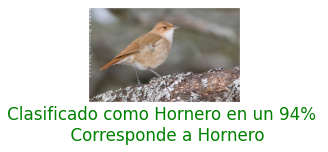

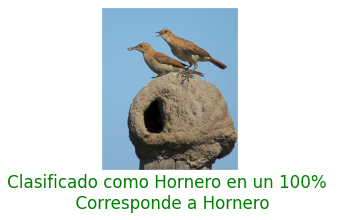

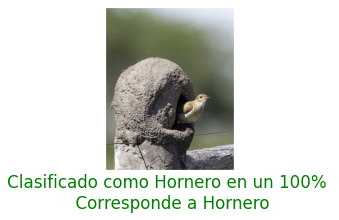

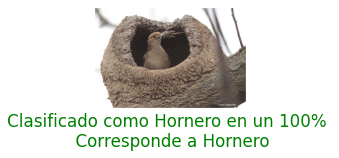

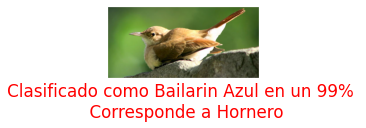

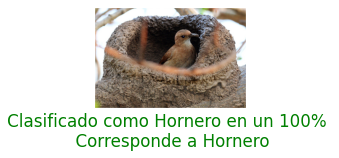

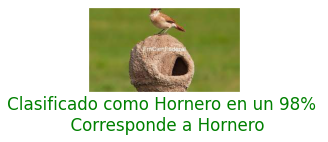

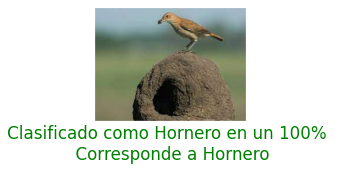

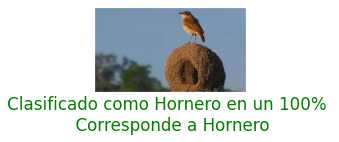

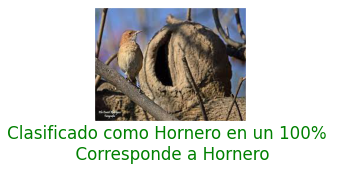

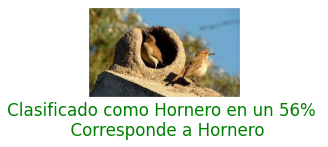

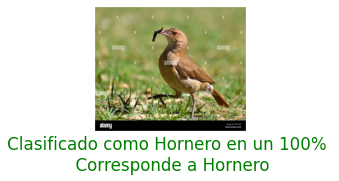

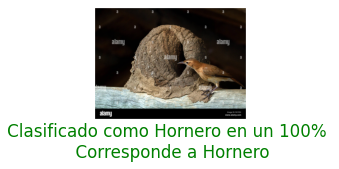

In [ ]:
def plot(predictions, test_labels, test_images):
  for i in range(len(predictions)):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plotImage(i, predictions[i], test_labels, test_images)
    plt.show()



def plotImage(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("Clasificado como {} en un {:2.0f}% \n Corresponde a {}".format(tipos_aves[predicted_label],
                                100*np.max(predictions_array),
                                tipos_aves[true_label]),
                                color=color)
  


plot(predictions, test_labels, test_images)